# Imports:


In [1]:
import pandas as pd
from pandas import Timestamp
import numpy as np
import datetime


#to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

import google_sheets_api as sheet #connection to server


In [2]:
#AI Librarys 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


# Download Stock Data:

In [3]:
def getAllSheets():
    sheet_aapl = sheet.AAPL_data.get_all_values() 
    sheet_amzn = sheet.AMZN_data.get_all_values()
    sheet_csco = sheet.CSCO_data.get_all_values()
    sheet_fb = sheet.FB_data.get_all_values()
    sheet_googl = sheet.GOOGL_data.get_all_values()
    sheet_IBM = sheet.IBM_data.get_all_values()
    sheet_intc = sheet.INTC_data.get_all_values()
    sheet_msft = sheet.MSFT_data.get_all_values()
    sheet_orcl = sheet.ORCL_data.get_all_values()
    sheet_qcom = sheet.QCOM_data.get_all_values()
    sheet_tsla = sheet.TSLA_data.get_all_values()
    sheet_vz = sheet.VZ_data.get_all_values()

    sheet_aapl = sheet_aapl[1:] #remove column names title
    sheet_amzn = sheet_amzn[1:] #remove column names title
    sheet_csco = sheet_csco[1:] #remove column names title
    sheet_fb = sheet_fb[1:] #remove column names title
    sheet_googl = sheet_googl[1:] #remove column names title
    sheet_intc = sheet_intc[1:] #remove column names title
    sheet_msft = sheet_msft[1:] #remove column names title
    sheet_IBM = sheet_IBM[1:] #remove column names title
    sheet_orcl = sheet_orcl[1:] #remove column names title
    sheet_qcom = sheet_qcom[1:] #remove column names title
    sheet_tsla = sheet_tsla[1:] #remove column names title
    sheet_vz = sheet_vz[1:] #remove column names title


    
    AAPL_data = pd.DataFrame(sheet_aapl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    AMZN_data = pd.DataFrame(sheet_amzn, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    CSCO_data = pd.DataFrame(sheet_csco, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    FB_data = pd.DataFrame(sheet_fb, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    GOOGL_data = pd.DataFrame(sheet_googl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    INTC_data = pd.DataFrame(sheet_intc, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    MSFT_data = pd.DataFrame(sheet_msft, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    IBM_data = pd.DataFrame(sheet_IBM, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    ORCL_data = pd.DataFrame(sheet_orcl, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    QCOM_data = pd.DataFrame(sheet_qcom, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    TSLA_data = pd.DataFrame(sheet_tsla, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 
    VZ_data = pd.DataFrame(sheet_vz, columns = ['timestamp','symbol','tradingDay','open','high','low','close','volume']) 


    return [AAPL_data, AMZN_data, CSCO_data, FB_data, GOOGL_data, INTC_data, MSFT_data, IBM_data, ORCL_data, QCOM_data, TSLA_data, VZ_data]

    
all_stock_data = getAllSheets()  ##THIS VAR HOLDS ALL OF THE STOCK DATA


# Reformat Server Data to Fit A.I. Model:

In [4]:
df_AAPL = all_stock_data[0] #AAPL
df_AMZN = all_stock_data[1] #AMZN
df_CSCO = all_stock_data[2] #CSCO
df_FB = all_stock_data[3] #FB
df_GOOGL = all_stock_data[4] #GOOGL
df_INTC = all_stock_data[5] #INTC
df_MSFT = all_stock_data[6] #MSFT
df_IBM = all_stock_data[7] #IBM
df_ORCL = all_stock_data[8] #ORCL
df_QCOM = all_stock_data[9] #QCOM
df_TLSA = all_stock_data[10] #TSLA
df_VZ = all_stock_data[11] #VZ

all_stock_dataframes = [df_AAPL, df_AMZN, df_CSCO, df_FB, df_GOOGL, df_INTC, df_MSFT, df_IBM, df_ORCL, df_QCOM, df_TLSA, df_VZ]

In [5]:
count = 0

for df in all_stock_dataframes:    
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)
    df['volume'] = df['volume'].astype(int)
    for index, row in df.iterrows():    
        if row['timestamp'].endswith('-05:00'):
            df['timestamp'].iloc[index] = row['timestamp'][:-6]
               
    df.index = df['timestamp']
    print(count, "of ", len(all_stock_dataframes), "stock dataframes successfully reformatted")
    count+=1

print("All data successfully reformatted!")

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0 of  12 stock dataframes successfully reformatted
1 of  12 stock dataframes successfully reformatted
2 of  12 stock dataframes successfully reformatted
3 of  12 stock dataframes successfully reformatted
4 of  12 stock dataframes successfully reformatted
5 of  12 stock dataframes successfully reformatted
6 of  12 stock dataframes successfully reformatted
7 of  12 stock dataframes successfully reformatted
8 of  12 stock dataframes successfully reformatted
9 of  12 stock dataframes successfully reformatted
10 of  12 stock dataframes successfully reformatted
11 of  12 stock dataframes successfully reformatted
All data successfully reformatted!


# INTIAL PLOTTING OF DATFRAMES:

- WILL ONLY BE WORKING WITH APPLE FOR NOW ON FOR TESTING PURPOSES

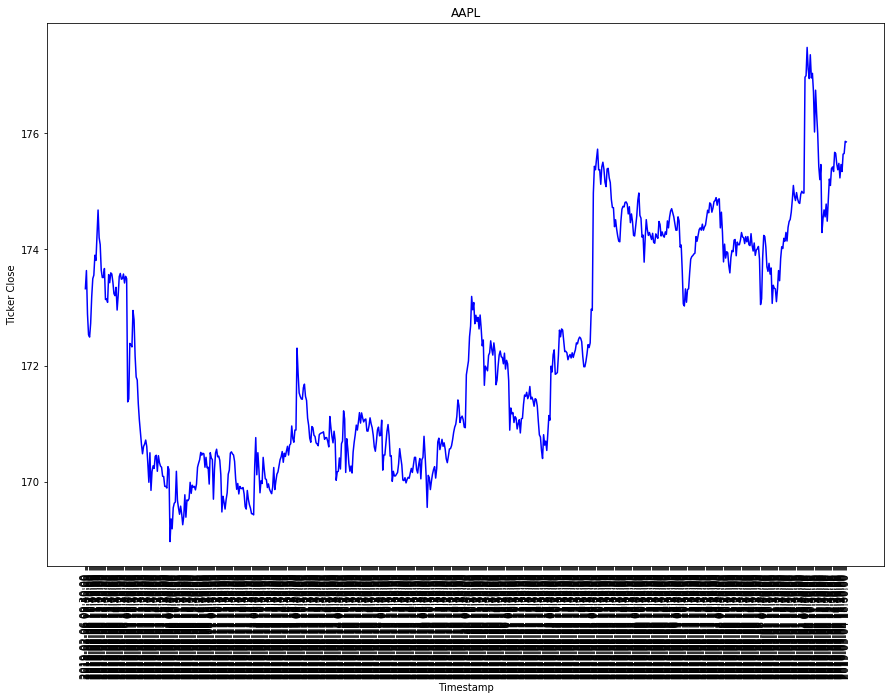

In [6]:
plt.figure(figsize=(15,10))
plt.xlabel('Timestamp')
plt.ylabel('Ticker Close')
plt.title('AAPL') 
plt.grid(False)
plt.xticks(rotation='vertical')
plt.plot(df_AAPL['timestamp'], df_AAPL['close'], 'b')


# LONG SHORT TERM MEMORY MACHINE LEARNING:

In [7]:
total_rows = df_AAPL.count()
print(total_rows['close'] +1)

training_data_split = int(total_rows['close']*0.8) #80% of the data becomes train data

721


In [35]:
def LSTM_prediction(data_point):
    #creating dataframe
    data = df_AAPL.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df_AAPL)),columns=['timestamp', data_point])

    print(new_data['timestamp'][0])
    print(data['timestamp'][0])

    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_point][i] = data[data_point][i]

    #setting index
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)


    #creating train and test sets
    dataset = new_data.values
    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

    #train
    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    #print(x_train)
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


    #predicting values, using past 60 from the train data
    inputs = new_data[len(new_data) - len(valid) - 60:].values   
    
    print(inputs)
    print(inputs.shape)
    
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    predictions = model.predict(X_test) #PREDICTIONS
    predictions = scaler.inverse_transform(predictions) #DE NORMALIZARION


    rms=np.sqrt(np.mean(np.power((valid.astype(float)-predictions),2)))
    print(rms)

    #for plotting
    train = new_data[:training_data_split]
    valid = new_data[training_data_split:]
   
    valid['Predictions'] = predictions
    plt.figure(figsize=(15,10))


    plt.plot(train[data_point], 'b')
    plt.plot(valid[[data_point,'Predictions']])

    plt.xlabel('timestamp')
    plt.ylabel(data_point)
    plt.title('AAPL' + data_point) 
     

    
    


nan
2019-02-06 09:30:00


/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 49s - loss: 0.0056
[[398280]
 [436864]
 [1080521]
 [1299552]
 [1361439]
 [761401]
 [575193]
 [690587]
 [426437]
 [409953]
 [515431]
 [277873]
 [475201]
 [460228]
 [413202]
 [316900]
 [292993]
 [236008]
 [209082]
 [169080]
 [168309]
 [181738]
 [242968]
 [297974]
 [205276]
 [221541]
 [271814]
 [125835]
 [169345]
 [226844]
 [208395]
 [157693]
 [126833]
 [136845]
 [199620]
 [276112]
 [193006]
 [290169]
 [303955]
 [208825]
 [301147]
 [275813]
 [755467]
 [1634187]
 [1131023]
 [612382]
 [607212]
 [491774]
 [924068]
 [612713]
 [631754]
 [359863]
 [329446]
 [372298]
 [385622]
 [307737]
 [238392]
 [236561]
 [315077]
 [249279]
 [223906]
 [213307]
 [205005]
 [148248]
 [194214]
 [149996]
 [164197]
 [302492]
 [189874]
 [184732]
 [119505]
 [163234]
 [206029]
 [150924]
 [269228]
 [292547]
 [226475]
 [189710]
 [299331]
 [331104]
 [443581]
 [406277]
 [891024]
 [2379499]
 [1214363]
 [634766]
 [561675]
 [748518]
 [562431]
 [430387]
 [384821]
 [436196]
 [408519]
 [300007]
 [356951]
 [338024]
 

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


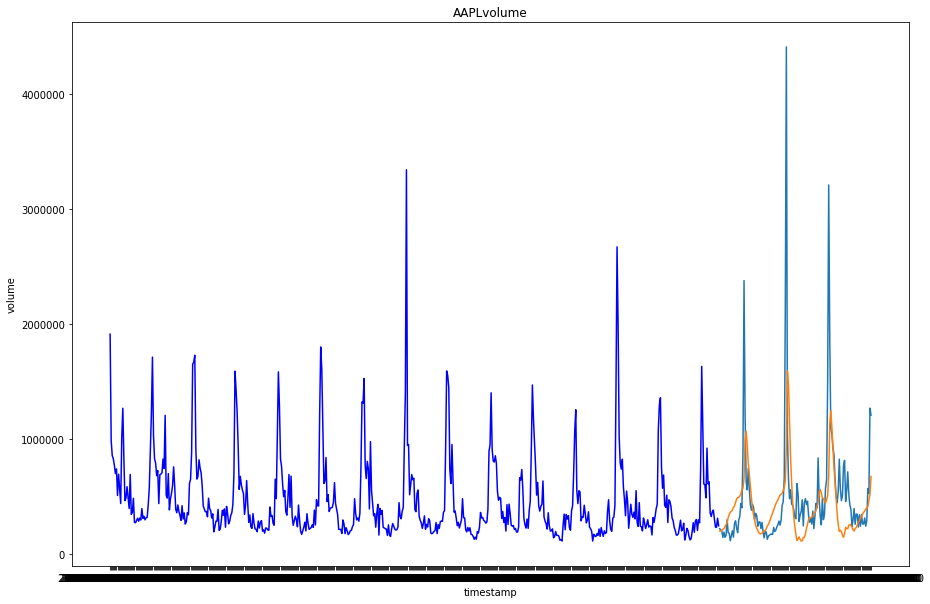

In [36]:
LSTM_prediction('volume') #Put any data point in here, ex: volume, close, open, high, low

# NORMALIZE DATA:

In [13]:
def LSTM_normalization(data_point):
    #creating dataframe
    data = df_AAPL.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df_AAPL)),columns=['timestamp', data_point])

    print(new_data['timestamp'][0])
    print(data['timestamp'][0])

    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_point][i] = data[data_point][i]

    #setting index
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)


    #creating train and test sets
    dataset = new_data.values
    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

    #plot
    plt.figure(figsize=(15,10))
    plt.plot(scaled_data, 'r')
    plt.xlabel('timestamp')
    plt.ylabel(data_point + 'NORMALIZED')
    plt.title('AAPL' + data_point + 'NORMALIZED') 

In [ ]:
LSTM_normalization('close') #Put any data point in here, ex: volume, close, open, high, low

In [15]:
def LSTM_normalization_log(data_point):
    #creating dataframe
    data = df_AAPL.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df_AAPL)),columns=['timestamp', data_point])

    print(new_data['timestamp'][0])
    print(data['timestamp'][0])

    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_point][i] = data[data_point][i]

    #setting index
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)


    #creating train and test sets
    dataset = new_data.values
    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%    
    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

    return scaled_data
    

### Individual normal Log

In [ ]:
data_name = 'volume'
log_data = LSTM_normalization_log(data_name) #Put any data point in here, ex: volume, close, open, high, low

#plot
plt.figure(figsize=(15,10))
plt.plot(log_data, 'r')
plt.xlabel('timestamp')
plt.ylabel(data_name + 'NORMALIZED and log')
plt.title('AAPL' + data_name + 'NORMALIZED and log') 
plt.gca().set_yscale('log')

### Stacked normal Log

In [ ]:

log_volume = LSTM_normalization_log('volume') #Put any data point in here, ex: volume, close, open, high, low
log_open = LSTM_normalization_log('open') #Put any data point in here, ex: volume, close, open, high, low
log_close = LSTM_normalization_log('close') #Put any data point in here, ex: volume, close, open, high, low
log_high = LSTM_normalization_log('high') #Put any data point in here, ex: volume, close, open, high, low
log_low = LSTM_normalization_log('low') #Put any data point in here, ex: volume, close, open, high, low

#plot
plt.figure(figsize=(15,10))

plt.plot(log_volume, 'r')
plt.plot(log_open, 'g')
plt.plot(log_close, 'b')
plt.plot(log_high, 'k')
plt.plot(log_low, 'y')

plt.xlabel('timestamp')
plt.ylabel('NORMALIZED and log')
plt.title('AAPL stacked NORMALIZED and log') 
plt.gca().set_yscale('log')

# LONG SHORT TERM MEMORY MACHINE LEARNING (MULIPLE INPUTS):

In [18]:
total_rows = df_AAPL.count()
print(total_rows['close'] +1)

training_data_split = int(total_rows['close']*0.8) #80% of the data becomes train data

721


In [47]:
def LSTM_prediction_multi_precision(data_points):
    #creating dataframe
    data = df_AAPL.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df_AAPL)),columns=['timestamp', data_points[0], data_points[1]])

  #  print(new_data['timestamp'][0])
  #  print(data['timestamp'][0])

    for i in range(0,len(data)):
        new_data['timestamp'][i] = data['timestamp'][i]
        new_data[data_points[0]][i] = data[data_points[0]][i]
        new_data[data_points[1]][i] = data[data_points[1]][i]
        
    #setting index
    new_data.index = new_data.timestamp
    new_data.drop('timestamp', axis=1, inplace=True)


    #creating train and test sets
    dataset = new_data.values
    train = dataset[0:training_data_split,:] #TRAINGING 80%
    valid = dataset[training_data_split:,:] #DATA POINTS TO BE PREDICTED 20%

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))   #NORMALIZARION
    scaled_data = scaler.fit_transform(dataset)   #FITS OUR DATA SET TO THE NORMALIZATION BETWEEN ONE AND ZERO

    #train
    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    #print(x_train)
    
    
    
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


    #predicting values, using past 60 from the train data
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    print(inputs)
    
    
    
 #   inputs1 = []
 #   inputs2 = []
 #   for i in inputs:
 #       inputs1.append([i[0]])
 #       inputs2.append([i[1]])
        
 #   inputs1 = np.asarray(inputs1)
 #   inputs2 = np.asarray(inputs2)
    
    
#    print(inputs1)
    
   
    print(inputs.shape)
    inputs = inputs.reshape(-1,2)   
    print(inputs.shape)

   # print(inputs)
    inputs  = scaler.transform(inputs)

    print("stop")
    
    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    print(x_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    predictons = model.predict(X_test) #PREDICTIONS
    predictons = scaler.inverse_transform(predictons) #DE NORMALIZARION


    rms=np.sqrt(np.mean(np.power((valid.astype(float)-predictons),2)))
    print('rms', rms)

    #for plotting
    train = new_data[:training_data_split]
    valid = new_data[training_data_split:]
    
    valid['Predictions'] = predictons
    plt.figure(figsize=(15,10))


    plt.plot(train[data_points[0]], 'b')
    plt.plot(valid[[data_points[0],'Predictions']])

    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title('AAPL' + data_points[0]) 
    
    
    
    


In [48]:
LSTM_prediction_multi_precision(['open', 'close']) #Put any data point in here, ex: volume, close, open, high, low

/Users/jamesgalante/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/1
 - 48s - loss: 0.0065
[[174.46 174.61]
 [174.61 174.48]
 [174.485 174.24]
 [174.24 174.23]
 [173.71 174.4]
 [174.42 174.57]
 [174.575 174.84]
 [174.86 174.97]
 [174.98 174.585]
 [174.5835 174.5367]
 [174.535 174.21]
 [174.22 174.245]
 [174.2498 173.78]
 [173.78 174.2]
 [174.21 174.5116]
 [174.52 174.34]
 [174.35 174.24]
 [174.2366 174.29]
 [174.3 174.23]
 [174.23 174.17]
 [174.17 174.2761]
 [174.27 174.12]
 [174.1264 174.105]
 [174.1 174.2666]
 [174.26 174.217]
 [174.21 174.19]
 [174.19 174.48]
 [174.49 174.43]
 [174.43 174.23]
 [174.22 174.3]
 [174.32 174.2347]
 [174.24 174.21]
 [174.2007 174.3]
 [174.31 174.26]
 [174.27 174.49]
 [174.5 174.37]
 [174.38 174.552]
 [174.55 174.66]
 [174.66 174.7]
 [174.71 174.63]
 [174.62 174.56]
 [174.56 174.45]
 [174.45 174.33]
 [174.34 174.33]
 [173.21 174.56]
 [174.56 174.49]
 [174.5 174.04]
 [174.05 174.075]
 [174.07 173.63]
 [173.635 173.06]
 [173.08 173.025]
 [173.04 173.32]
 [173.32 173.09]
 [173.095 173.31]
 [173.33 173.32]
 [173.35 1

NameError: name 'x_test' is not defined

In [ ]:

    inputs1 = []
    inputs2 = []
    for i in inputs:
        inputs1.append([i[0]])
        inputs2.append([i[1]])
        
    inputs1 = np.asarray(inputs1)
    inputs2 = np.asarray(inputs2)
    
    
#    print(inputs1)
    
    print(inputs2.shape)
    inputs2 = inputs2.reshape(-1,1)   
    inputs2  = scaler.transform(inputs2)

    X_test = []
    for i in range(60,inputs1.shape[0]):
        X_test.append(inputs1[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    predictons = model.predict(X_test) #PREDICTIONS
    predictons = scaler.inverse_transform(predictons) #DE NORMALIZARION


    rms=np.sqrt(np.mean(np.power((valid.astype(float)-predictons),2)))
    print('rms', rms)

    #for plotting
    train = new_data[:training_data_split]
    valid = new_data[training_data_split:]
    
    valid['Predictions'] = predictons
    plt.figure(figsize=(15,10))


    plt.plot(train[data_points[0]], 'b')
    plt.plot(valid[[data_points[0],'Predictions']])

    plt.xlabel('timestamp')
    plt.ylabel(data_points[0])
    plt.title('AAPL' + data_points[0]) 